<a href="https://colab.research.google.com/github/mauryasameer/LJMU_COHORT_13/blob/main/CoNLL_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 14.5 MB/s 
     |████████████████████████████████| 212 kB 63.9 MB/s 
     |████████████████████████████████| 182 kB 52.2 MB/s 
     |████████████████████████████████| 115 kB 76.9 MB/s 
     |████████████████████████████████| 127 kB 69.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from datasets import load_dataset
from tqdm import tqdm

In [ ]:
dataset = load_dataset("conll2003")

Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

Dataset conll2003 downloaded and prepared to /root/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/9a4d16a94f8674ba3466315300359b0acd891b68b6c8743ddf60b9c702adce98. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset['train']

Dataset({
    features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
    num_rows: 14041
})

In [ ]:
pos_tags = {'"': 0, "''": 1, '#': 2, '$': 3, '(': 4, ')': 5, ',': 6, '.': 7, ':': 8, '``': 9, 'CC': 10, 'CD': 11, 'DT': 12,
 'EX': 13, 'FW': 14, 'IN': 15, 'JJ': 16, 'JJR': 17, 'JJS': 18, 'LS': 19, 'MD': 20, 'NN': 21, 'NNP': 22, 'NNPS': 23,
 'NNS': 24, 'NN|SYM': 25, 'PDT': 26, 'POS': 27, 'PRP': 28, 'PRP$': 29, 'RB': 30, 'RBR': 31, 'RBS': 32, 'RP': 33,
 'SYM': 34, 'TO': 35, 'UH': 36, 'VB': 37, 'VBD': 38, 'VBG': 39, 'VBN': 40, 'VBP': 41, 'VBZ': 42, 'WDT': 43,
 'WP': 44, 'WP$': 45, 'WRB': 46}


In [ ]:
chuck_tokens = {'O': 0, 'B-ADJP': 1, 'I-ADJP': 2, 'B-ADVP': 3, 'I-ADVP': 4, 'B-CONJP': 5, 'I-CONJP': 6, 'B-INTJ': 7, 'I-INTJ': 8,
 'B-LST': 9, 'I-LST': 10, 'B-NP': 11, 'I-NP': 12, 'B-PP': 13, 'I-PP': 14, 'B-PRT': 15, 'I-PRT': 16, 'B-SBAR': 17,
 'I-SBAR': 18, 'B-UCP': 19, 'I-UCP': 20, 'B-VP': 21, 'I-VP': 22}


In [ ]:
ner_tage = {'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6, 'B-MISC': 7, 'I-MISC': 8}


In [ ]:
def extract_nouns(dataset):
    tokens = dataset['train']['tokens']
    pos_tokens = dataset['train']['pos_tags']
    noun_list = [] 
    for token in tqdm(range(len(tokens))):
        t_token = []
        for t in range(len(tokens[token])):
            if pos_tokens[token][t] in range(21,25):
                t_token.append(tokens[token][t])
        if len(t_token)>0:
            noun_list.append(t_token)
    return noun_list

In [ ]:
noun_list = extract_nouns(dataset)

100%|██████████| 14041/14041 [00:00<00:00, 145108.35it/s]


In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
j = []
for word in noun_list:
    j.extend(word)
    #  for i in noun_list]

In [ ]:
counts = Counter(j)

In [ ]:
count_df = pd.DataFrame({'Word': counts.keys(),'Count':counts.values()})

In [ ]:
count_df = count_df.sort_values(by=['Count'], ascending=False).reset_index(drop=True)

In [ ]:
count_df.head(20)


,Word,Count
0,U.S.,377
1,percent,303
2,year,293
3,Thursday,285
4,Wednesday,261
5,government,258
6,police,222
7,Tuesday,212
8,Monday,192
9,Friday,181


Text(0.5, 1.0, 'Noun Count')

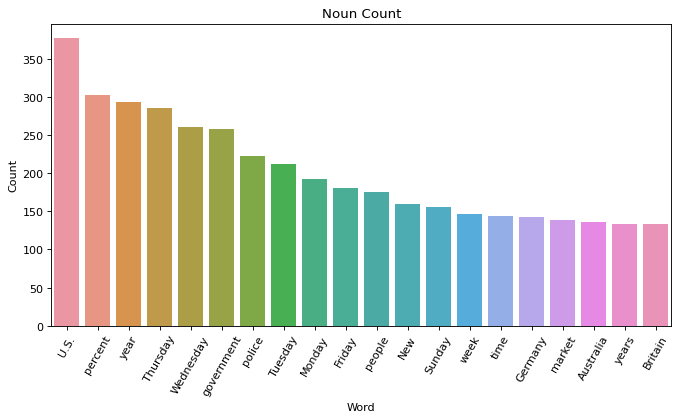

In [ ]:
plt.figure(figsize=[10,5], dpi=80)
ax = sns.barplot(x=count_df.head(20)['Word'],y=count_df.head(20)['Count'])
plt.xticks(rotation=60)
plt.title('Noun Count')